C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Cluster 0: 61 points
Cluster 1: 76 points
Cluster 2: 52 points
Cluster 3: 83 points
Cluster 4: 67 points
Cluster 5: 75 points
Cluster 6: 27 points
Cluster 7: 100 points
Cluster 8: 89 points
Cluster 9: 31 points
Silhouette Score: 0.5601088434159449
Davies-Bouldin Index: 0.5532482395348187


C:\Users\User\AppData\Local\Temp\ipykernel_6248\3448461198.py:46: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', n_clusters)


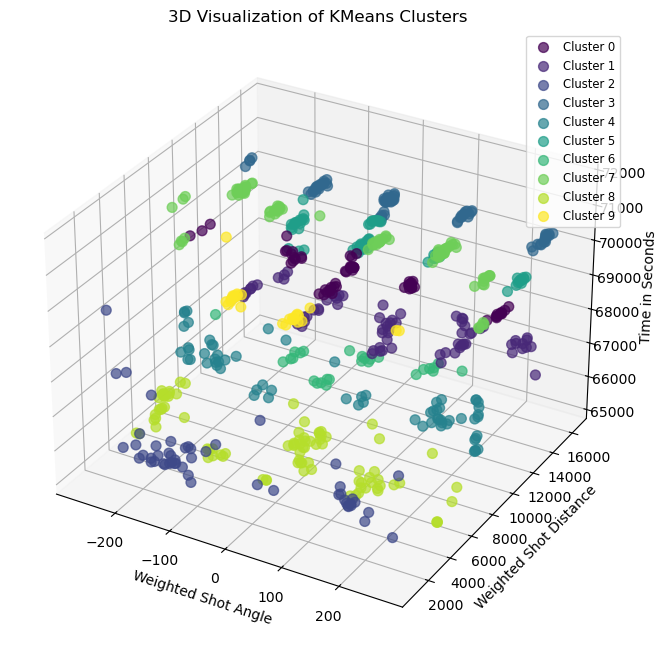

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# קריאת הדאטה הנקי (לא מנורמל)
df = pd.read_csv('clean_df.csv')  # הכנס את הנתיב הנכון לקובץ שלך

# שקלול המיקום לעומת הזמן
df['Weighted_Angle'] = df['ShotAngle'] * 3
df['Weighted_Distance'] = df['ShotDistance'] * 2
df['Weighted_Time'] = df['TimeInSeconds'] * 1

# יצירת דאטה משוקלל לקלאסטרינג
weighted_data = df[['Weighted_Angle', 'Weighted_Distance', 'Weighted_Time','Position', '3P-Range']]

# בחירת מספר הקלאסטרים
n_clusters = 10  # יש לבחור את המספר המתאים לאחר ניתוח

# ביצוע קלאסטרינג עם KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(weighted_data)

# הוספת התוויות לדאטה פריים
df['Cluster'] = labels

# הדפסת מספר הנקודות בכל קלאסטר
unique_clusters, counts = np.unique(labels, return_counts=True)
for cluster, count in zip(unique_clusters, counts):
    print(f"Cluster {cluster}: {count} points")

# חישוב מדדי הערכה
silhouette = silhouette_score(weighted_data, labels)
davies_bouldin = davies_bouldin_score(weighted_data, labels)
print(f"Silhouette Score: {silhouette}")
print(f"Davies-Bouldin Index: {davies_bouldin}")

# ויזואליזציה תלת מימדית של הקלאסטרים
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# הגדרת צבעים לכל קלאסטר
colors = plt.cm.get_cmap('viridis', n_clusters)

for cluster in unique_clusters:
    cluster_data = df[df['Cluster'] == cluster]
    ax.scatter(cluster_data['Weighted_Angle'], cluster_data['Weighted_Distance'], cluster_data['Weighted_Time'], 
               c=np.array([colors(cluster)]), label=f'Cluster {cluster}', s=50, alpha=0.7)

# הגדרות גרף
ax.set_title('3D Visualization of KMeans Clusters')
ax.set_xlabel('Weighted Shot Angle')
ax.set_ylabel('Weighted Shot Distance')
ax.set_zlabel('Time in Seconds')
plt.legend(loc='best', fontsize='small')
plt.grid(True)

# הצגת הגרף
plt.show()


C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

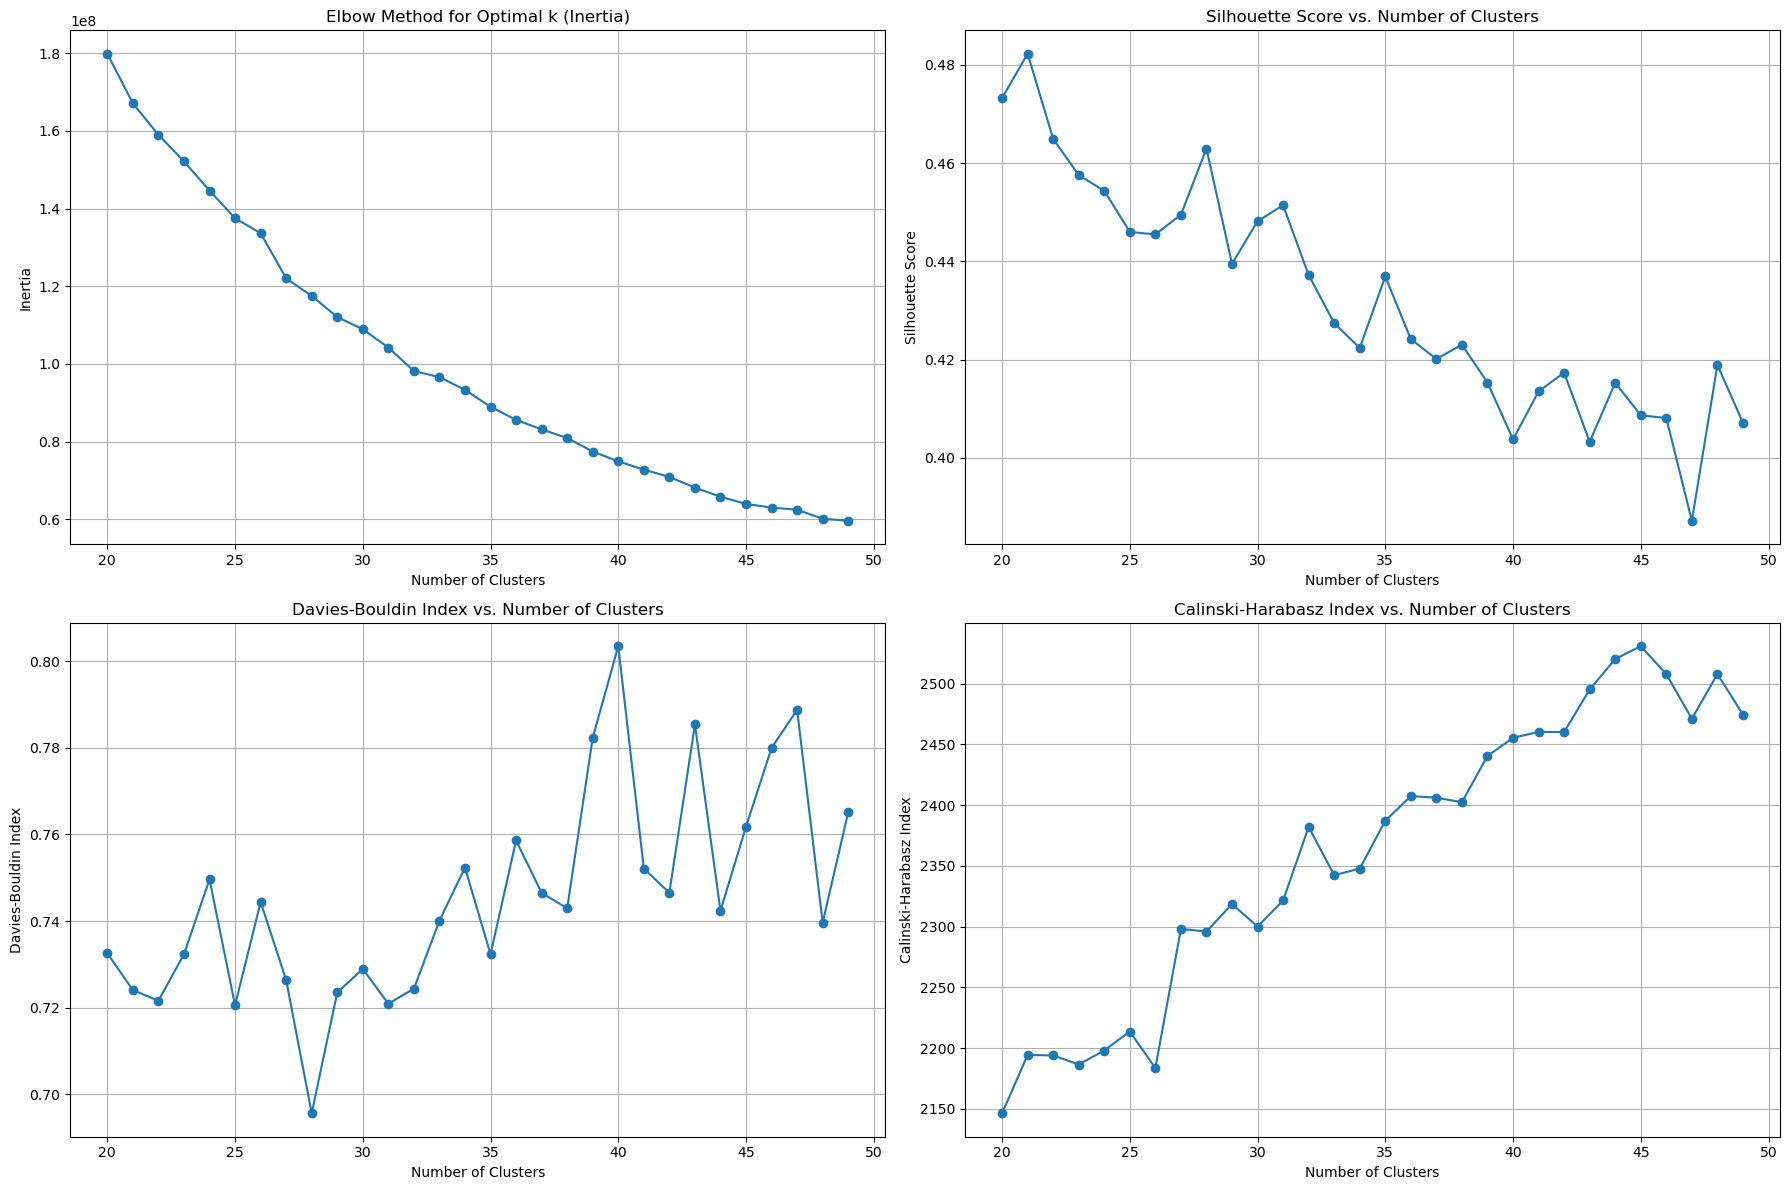

Optimal number of clusters based on Silhouette Score: 21
Optimal number of clusters based on Davies-Bouldin Index: 28
Optimal number of clusters based on Calinski-Harabasz Index: 45


In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt

# קריאת הדאטה הנקי (לא מנורמל)
df = pd.read_csv('clean_df.csv')  # הכנס את הנתיב הנכון לקובץ שלך

# שקלול המיקום לעומת הזמן
df['Weighted_Angle'] = df['ShotAngle'] * 3
df['Weighted_Distance'] = df['ShotDistance'] * 2
df['Weighted_Time'] = df['TimeInSeconds'] * 1

# יצירת דאטה משוקלל לקלאסטרינג
weighted_data = df[['Weighted_Angle', 'Weighted_Distance', 'Weighted_Time', 'Position', '3P-Range']]

# טווח מספרי הקלאסטרים לבדיקה
cluster_range = range(20, 50)

# רשימות לאחסון המדדים עבור כל מספר קלאסטרים
inertia = []
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []

# ביצוע KMeans עבור כל מספר קלאסטרים בטווח
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(weighted_data)
    
    inertia.append(kmeans.inertia_)  # שמירת העלות (Inertia)
    silhouette = silhouette_score(weighted_data, labels)
    silhouette_scores.append(silhouette)  # שמירת Silhouette Score
    davies_bouldin = davies_bouldin_score(weighted_data, labels)
    davies_bouldin_scores.append(davies_bouldin)  # שמירת Davies-Bouldin Index
    calinski_harabasz = calinski_harabasz_score(weighted_data, labels)
    calinski_harabasz_scores.append(calinski_harabasz)  # שמירת Calinski-Harabasz Index

# ויזואליזציה של כל המדדים
plt.figure(figsize=(18, 12))

# גרף למבחן המרפק (Inertia)
plt.subplot(2, 2, 1)
plt.plot(cluster_range, inertia, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal k (Inertia)')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)

# גרף של Silhouette Score
plt.subplot(2, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)

# גרף של Davies-Bouldin Index
plt.subplot(2, 2, 3)
plt.plot(cluster_range, davies_bouldin_scores, marker='o', linestyle='-')
plt.title('Davies-Bouldin Index vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')
plt.grid(True)

# גרף של Calinski-Harabasz Index
plt.subplot(2, 2, 4)
plt.plot(cluster_range, calinski_harabasz_scores, marker='o', linestyle='-')
plt.title('Calinski-Harabasz Index vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski-Harabasz Index')
plt.grid(True)

plt.tight_layout()
plt.show()

# מציאת מספר הקלאסטרים האופטימלי לפי Silhouette Score
optimal_clusters_silhouette = cluster_range[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters based on Silhouette Score: {optimal_clusters_silhouette}")

# מציאת מספר הקלאסטרים האופטימלי לפי Davies-Bouldin Index
optimal_clusters_davies = cluster_range[np.argmin(davies_bouldin_scores)]
print(f"Optimal number of clusters based on Davies-Bouldin Index: {optimal_clusters_davies}")

# מציאת מספר הקלאסטרים האופטימלי לפי Calinski-Harabasz Index
optimal_clusters_calinski = cluster_range[np.argmax(calinski_harabasz_scores)]
print(f"Optimal number of clusters based on Calinski-Harabasz Index: {optimal_clusters_calinski}")


In [ ]:
## נראה שמשהו קורה בקלאסטר 30 

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Cluster 0: 44 points
Cluster 1: 4 points
Cluster 2: 35 points
Cluster 3: 20 points
Cluster 4: 30 points
Cluster 5: 30 points
Cluster 6: 39 points
Cluster 7: 9 points
Cluster 8: 30 points
Cluster 9: 11 points
Cluster 10: 44 points
Cluster 11: 36 points
Cluster 12: 44 points
Cluster 13: 16 points
Cluster 14: 21 points
Cluster 15: 4 points
Cluster 16: 33 points
Cluster 17: 15 points
Cluster 18: 28 points
Cluster 19: 33 points
Cluster 20: 12 points
Cluster 21: 15 points
Cluster 22: 1 points
Cluster 23: 40 points
Cluster 24: 19 points
Cluster 25: 1 points
Cluster 26: 17 points
Cluster 27: 30 points
Silhouette Score: 0.4629439110795626
Davies-Bouldin Index: 0.6956079060251229


C:\Users\User\AppData\Local\Temp\ipykernel_6248\563546475.py:45: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', n_clusters)


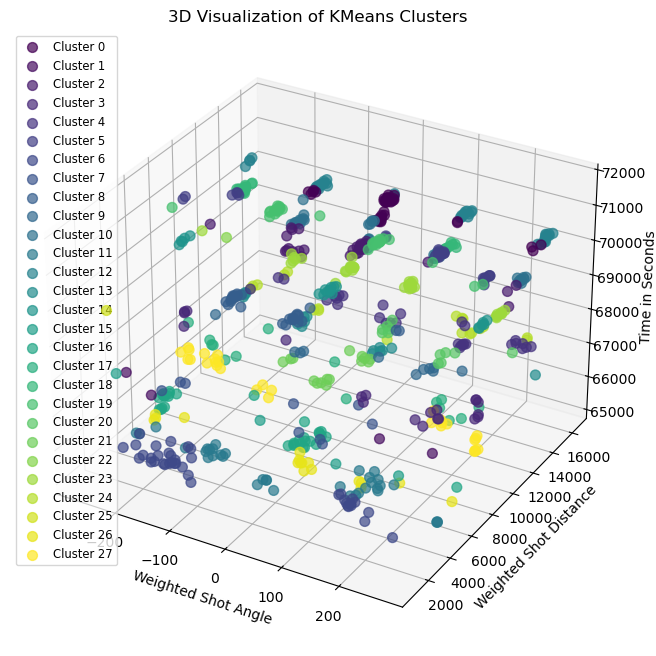

In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# קריאת הדאטה הנקי (לא מנורמל)

# שקלול המיקום לעומת הזמן
df['Weighted_Angle'] = df['ShotAngle'] * 3
df['Weighted_Distance'] = df['ShotDistance'] * 2
df['Weighted_Time'] = df['TimeInSeconds'] * 1

# יצירת דאטה משוקלל לקלאסטרינג
weighted_data = df[['Weighted_Angle', 'Weighted_Distance', 'Weighted_Time','Position', '3P-Range']]

# בחירת מספר הקלאסטרים
n_clusters = 28  # יש לבחור את המספר המתאים לאחר ניתוח

# ביצוע קלאסטרינג עם KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(weighted_data)

# הוספת התוויות לדאטה פריים
df['Cluster'] = labels

# הדפסת מספר הנקודות בכל קלאסטר
unique_clusters, counts = np.unique(labels, return_counts=True)
for cluster, count in zip(unique_clusters, counts):
    print(f"Cluster {cluster}: {count} points")

# חישוב מדדי הערכה
silhouette = silhouette_score(weighted_data, labels)
davies_bouldin = davies_bouldin_score(weighted_data, labels)
print(f"Silhouette Score: {silhouette}")
print(f"Davies-Bouldin Index: {davies_bouldin}")

# ויזואליזציה תלת מימדית של הקלאסטרים
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# הגדרת צבעים לכל קלאסטר
colors = plt.cm.get_cmap('viridis', n_clusters)

for cluster in unique_clusters:
    cluster_data = df[df['Cluster'] == cluster]
    ax.scatter(cluster_data['Weighted_Angle'], cluster_data['Weighted_Distance'], cluster_data['Weighted_Time'], 
               c=np.array([colors(cluster)]), label=f'Cluster {cluster}', s=50, alpha=0.7)

# הגדרות גרף
ax.set_title('3D Visualization of KMeans Clusters')
ax.set_xlabel('Weighted Shot Angle')
ax.set_ylabel('Weighted Shot Distance')
ax.set_zlabel('Time in Seconds')
plt.legend(loc='best', fontsize='small')
plt.grid(True)

# הצגת הגרף
plt.show()


C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\User\AppData\Local\Temp\ipykernel_6248\1582519974.py:58: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('hsv', len(unique_clusters))  # שימוש במפת צבעים עשירה יותר


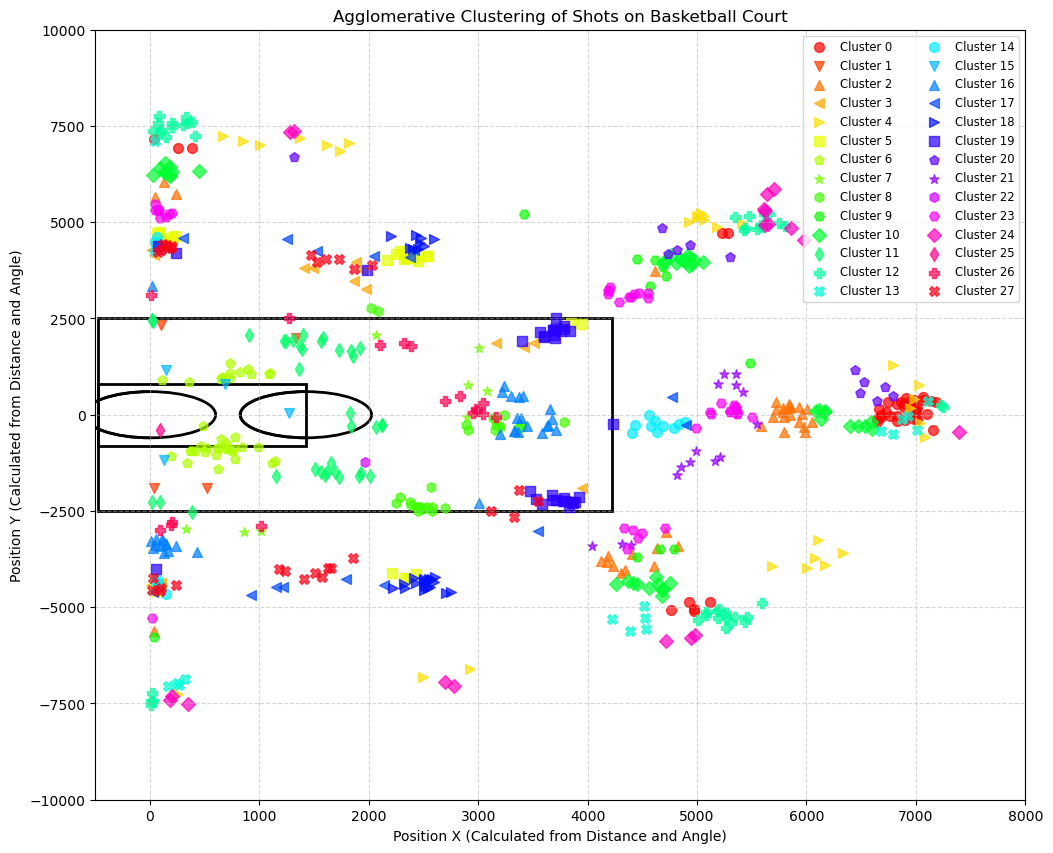

In [10]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# שקלול המיקום לעומת הזמן
df['Weighted_Angle'] = df['ShotAngle'] * 3
df['Weighted_Distance'] = df['ShotDistance'] * 2
df['Weighted_Time'] = df['TimeInSeconds'] * 1

# יצירת דאטה משוקלל לקלאסטרינג
weighted_data = df[['Weighted_Angle', 'Weighted_Distance', 'Weighted_Time', 'Position', '3P-Range']]

# בחירת מספר הקלאסטרים
n_clusters = 28  # מספר קלאסטרים מותאם לאחר ניתוח המדדים
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(weighted_data)

# הוספת התוויות לדאטה פריים
df['Cluster'] = labels

# פונקציה לציור מגרש כדורסל
def draw_scaled_rotated_court(ax=None, color='black', lw=2, scale=100):
    if ax is None:
        ax = plt.gca()

    # התאמת גודל המגרש לפי הסקאלה המנורמלת
    court_elements = [
        patches.Rectangle((-47.5 * scale, -250 * scale), 470 * scale, 500 * scale, linewidth=lw, color=color, fill=False),  # חצי מגרש
        patches.Circle((0, 0), 60 * scale, linewidth=lw, color=color, fill=False),  # הכדור המרכזי
        patches.Arc((0, 0), 120 * scale, 120 * scale, theta1=90, theta2=270, linewidth=lw, color=color),  # חצי מעגל המרכז
        patches.Rectangle((-47.5 * scale, -80 * scale), 190 * scale, 160 * scale, linewidth=lw, color=color, fill=False),  # אזור העונשין
        patches.Circle((142.5 * scale, 0), 60 * scale, linewidth=lw, color=color, fill=False),  # עיגול העונשין
        patches.Arc((142.5 * scale, 0), 120 * scale, 120 * scale, theta1=90, theta2=270, linewidth=lw, color=color),  # חצי מעגל העונשין
        #patches.Arc((0, 0), 475 * scale, 475 * scale, theta1=22, theta2=158, linewidth=lw, color=color),  # קו השלוש
    ]

    # הוספת כל חלק למגרש
    for element in court_elements:
        ax.add_patch(element)

# חישוב מיקומי X ו-Y על המגרש עם שימוש בזווית המקורית ולא מנורמלת
df['PlotX'] = df['ShotDistance'] * np.cos(np.radians(df['ShotAngle']))
df['PlotY'] = df['ShotDistance'] * np.sin(np.radians(df['ShotAngle']))

# יצירת גרף פיזור למיקום הזריקות על מגרש הכדורסל לפי המרחק והזווית המקוריים
plt.figure(figsize=(12, 10))
ax = plt.gca()

# ציור המגרש בסיבוב של 90 מעלות ובהתאמת גודל לסקאלה המנורמלת
draw_scaled_rotated_court(ax, scale=10)  # התאמה של scale כך שהמגרש יוצג בסקאלה המנורמלת

# הגדרת צבעים וסימנים לקלאסטרים
unique_clusters = sorted(df['Cluster'].unique())  # מיון הערכים הייחודיים של הקלאסטרים
colors = plt.cm.get_cmap('hsv', len(unique_clusters))  # שימוש במפת צבעים עשירה יותר
markers = ['o', 'v', '^', '<', '>', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X']  # מגוון סימנים

# ציור הזריקות לפי קלאסטרים (מיקום לפי מרחק וזווית)
for idx, cluster in enumerate(unique_clusters):
    cluster_data = df[df['Cluster'] == cluster]
    marker = markers[idx % len(markers)]  # בחירת סימן מתוך הרשימה, תוך שימוש במודולו כדי למחזר סימנים
    color = colors(idx)  # בחירת צבע מתוך מפת הצבעים
    
    if cluster == -1:
        # רעש בצבע אפור
        ax.scatter(cluster_data['PlotX'], cluster_data['PlotY'], c='grey', label='Noise', s=50, alpha=0.5, marker='x')
    else:
        # קלאסטרים בצבעים וסימנים שונים
        ax.scatter(
            cluster_data['PlotX'], cluster_data['PlotY'], 
            c=[color], label=f'Cluster {cluster}', s=50, alpha=0.7, marker=marker
        )

# הגדרות גרף מותאמות לסקאלה החדשה
ax.set_xlim(-500, 8000)
ax.set_ylim(-10000, 10000)
ax.set_title('Agglomerative Clustering of Shots on Basketball Court')
ax.set_xlabel('Position X (Calculated from Distance and Angle)')
ax.set_ylabel('Position Y (Calculated from Distance and Angle)')
plt.legend(loc='upper right', fontsize='small', ncol=2)  # הצגת אגדה עם מספר עמודות
plt.grid(True, linestyle='--', alpha=0.5)

# הצגת הגרף
plt.show()
